<a href="https://colab.research.google.com/github/sujit-kumar-singh-9115/Capstone-Classification-Project---Cardiovascular-Risk-Prediction/blob/main/Capstone(Classification)_Project_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Capstone(Classification) Project - Cardiovascular Risk Prediction

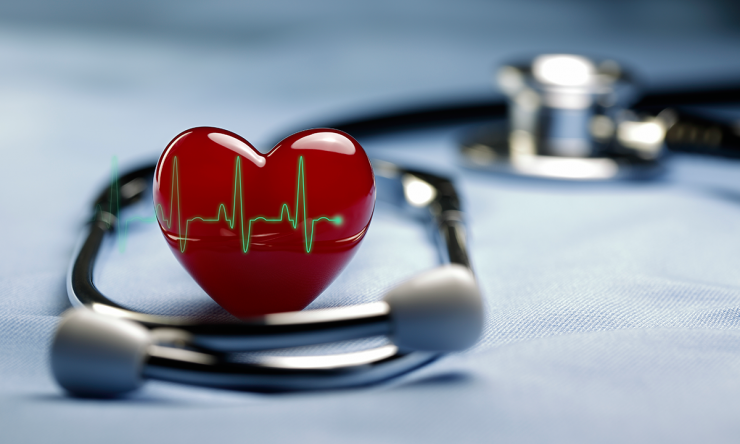

**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,**
**Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of**
**future coronary heart disease (CHD). The dataset provides the patients’ information. It includes**
**over 4,000 records and 15 attributes.**
**Variables**
**Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk**
**factors.**

**Data Description**
**Demographic:**

**• Sex: male or female("M" or "F")**

**• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to**
**whole numbers, the concept of age is continuous)**

**Behavioral**

**• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")**

**• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be**
**considered continuous as one can have any number of cigarettes, even half a cigarette.)**

**Medical( history)**

**• BP Meds: whether or not the patient was on blood pressure medication (Nominal)**

**• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)**

**• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)**

**• Diabetes: whether or not the patient had diabetes (Nominal)**

**Medical(current)**

**• Tot Chol: total cholesterol level (Continuous)**

**• Sys BP: systolic blood pressure (Continuous)**

**• Dia BP: diastolic blood pressure (Continuous)**

**• BMI: Body Mass Index (Continuous)**

**• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in**
**fact discrete, yet are considered continuous because of large number of possible values.)**

**• Glucose: glucose level (Continuous)**

**Predict variable (desired target)**

**• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0”** **means “No”)**

In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer


sns.set_style('darkgrid') 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# saving data from csv to dataframe
df_cardiovascular = pd.read_csv('/content/drive/MyDrive/Alma-Better Folder/Module 4/Capstone(Classification) Project - Cardiovascular Risk Prediction/Copy of data_cardiovascular_risk.csv')

In [ ]:
# checking the data columns and values for first 10 rows
df_cardiovascular.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
#shape of the data
df_cardiovascular.shape

(3390, 17)

In [ ]:
#information of the data
df_cardiovascular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
df_cardiovascular.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df_cardiovascular.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

#Checking the null values(missing values)#

In [ ]:
#information of the missing values
df_cardiovascular.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

# Data Preprocessing & Feature engineering

In [ ]:
# looking column names, datatype of features, null values, unique values and their number of unique values
cardiovascular_detais = [[col,df_cardiovascular[col].dtype,df_cardiovascular[col].isna().sum(),
                            round(df_cardiovascular[col].isnull().sum()/len(df_cardiovascular)*100,2),df_cardiovascular[col].nunique(),
                            df_cardiovascular[col].unique()] for col in df_cardiovascular.columns]
df_cardiovascular_details = pd.DataFrame(cardiovascular_detais, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])  
df_cardiovascular_details                         

,Column,Dtype,Null,Null (%),nUnique,Unique
0,id,int64,0,0.00,3390,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,age,int64,0,0.00,39,"[64, 36, 46, 50, 61, 41, 55, 53, 43, 44, 58, 5..."
2,education,float64,87,2.57,4,"[2.0, 4.0, 1.0, 3.0, nan]"
3,sex,object,0,0.00,2,"[F, M]"
4,is_smoking,object,0,0.00,2,"[YES, NO]"
5,cigsPerDay,float64,22,0.65,32,"[3.0, 0.0, 10.0, 20.0, 30.0, 35.0, 40.0, 15.0,..."
6,BPMeds,float64,44,1.30,2,"[0.0, nan, 1.0]"
7,prevalentStroke,int64,0,0.00,2,"[0, 1]"
8,prevalentHyp,int64,0,0.00,2,"[0, 1]"
9,diabetes,int64,0,0.00,2,"[0, 1]"


In [ ]:
#Sanity check
round(df_cardiovascular.isnull().sum()/len(df_cardiovascular)*100,2).sort_values(ascending=False).head(10)

glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
id            0.00
diaBP         0.00
sysBP         0.00
dtype: float64

We havee missing values in:
 

*   glucose    -       8.97 %
*   education   -      2.57 %
*   BPMeds      -      1.30 %
*   totChol    -       1.12 %
*   cigsPerDay  -      0.65 %
*   BMI         -      0.41 %
*   heartRate  -       0.03 %

* Except glucose all other features in the dataset have less than 5% null values.

* Now the main issue with these null values is that they can't be estimated from other data entries. The dataset we are working on is from a medical domain, that said, the entries in this data are person specific and the values vary among different individuals. Its a rare chance the two individuals share same health stats, hence the most logical option that we have to deal with such values is removing the rows with any null value.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

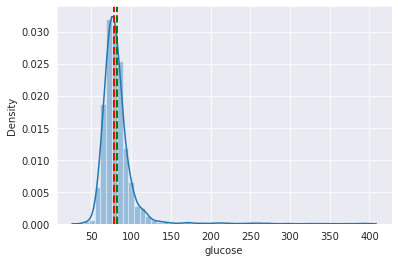

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.distplot(df_cardiovascular['glucose'])
ax.axvline(df_cardiovascular['glucose'].median(), color='red', linestyle='dashed', linewidth=2)
ax.axvline(df_cardiovascular['glucose'].mean(), color='green', linestyle='dashed', linewidth=2)
plt.show

* Since the Glucose distribution plot is normaly distributed we will fill the nan by mean

In [ ]:
# filling glucose with the mean value
df_cardiovascular['glucose'].fillna(df_cardiovascular['glucose'].mean(), inplace = True)

In [ ]:
# dropping the missing value.
df_cardiovascular.dropna(how = "any", inplace = True)

In [ ]:
# Checking if there's still any null values left.
df_cardiovascular.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

* There are no null values present in our dataset

#**Checking duplicate values**

In [ ]:
# Checking for the duplicate values
df_cardiovascular.duplicated().sum()

0

* There are no duplicate values in our dataset

#**Dropping irrelevant features**

In [ ]:
#Dropping redundant variable "id"
df_cardiovascular.drop("id",axis=1,inplace=True) 

*   Since ID has no effect on target variable so we will drop this column from our dataset.

#**Dealing with outliers**

In [ ]:
# Numerical variables
numerical = [var for var in df_cardiovascular.columns if df_cardiovascular[var].dtype !='O'and var not in ['BPMeds','diabetes','prevalentStroke','prevalentHyp','TenYearCHD'] ]
print('There are {} numerical variables'.format(len(numerical)))
print(numerical)

There are 9 numerical variables
['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


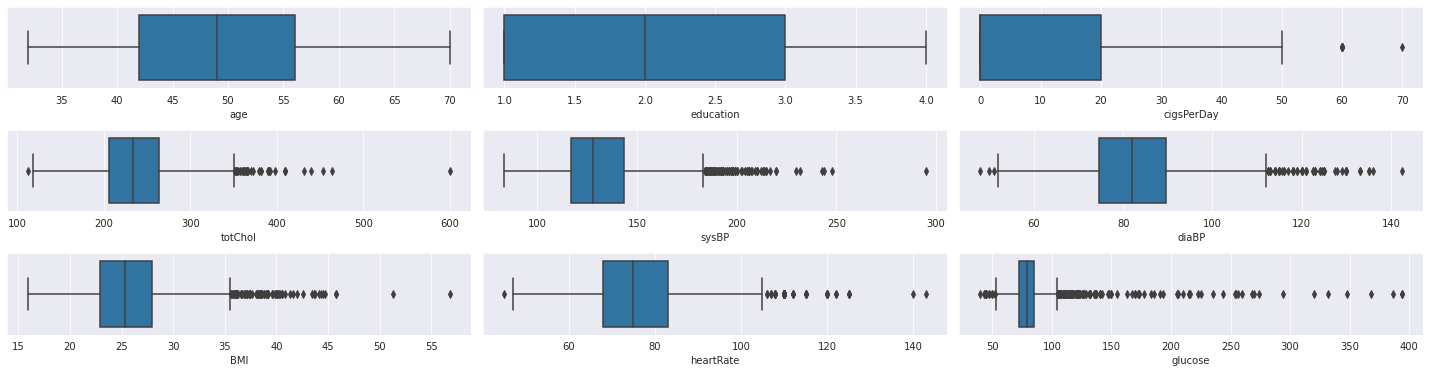

In [ ]:
# looking for outliers of every fearture of dataset with the help of boxplot
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num = 1 

for col in numerical:
    plt.subplot(6,3,num)
    sns.boxplot(df_cardiovascular[col])
    num+=1
    
plt.tight_layout()

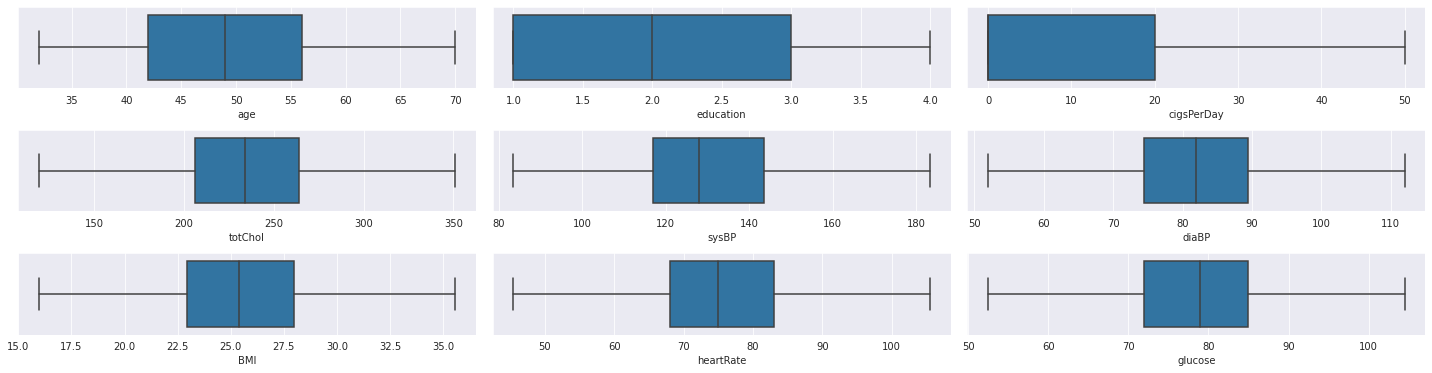

In [ ]:
##Dealing with the outliers by Capping the outlier rows with Percentiles
plt.figure(figsize = (20, 10))
num = 1 

for col in numerical:
    plt.subplot(6,3,num)
    iqr = (np.quantile(df_cardiovascular[col], 0.75))-(np.quantile(df_cardiovascular[col], 0.25))
    upper_bound = np.quantile(df_cardiovascular[col], 0.75)+(1.5*iqr)
    lower_bound = np.quantile(df_cardiovascular[col], 0.25)-(1.5*iqr)
    df_cardiovascular[col] = np.where(df_cardiovascular[col] > upper_bound,
                               upper_bound,df_cardiovascular[col]) #higher
    df_cardiovascular[col] = np.where(df_cardiovascular[col] < lower_bound, 
                               lower_bound,df_cardiovascular[col])
    sns.boxplot(df_cardiovascular[col])
    num+=1
    
plt.tight_layout()

* Now, there are no outliers present in our dataset.

# **Categorical encoding**

In [ ]:
# Categorical encoding for smoking column (0='NO' and 1 ='YES')
df_cardiovascular['is_smoking'].replace({'YES':1,'NO':0},inplace=True)

# Categorical encoding for smoking column (1='M' and 2 ='F')
df_cardiovascular['sex'].replace({'M':0,'F':1},inplace=True)

# **Renaming Target Variable**

In [22]:
#Renaming Target Variable TenYearCHD  to Heart_DiseaseProbability
df_cardiovascular = df_cardiovascular.rename(columns={'TenYearCHD':'Heart_DiseaseProbability'})

In [23]:
df_cardiovascular.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3189 entries, 1 to 3389
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       3189 non-null   float64
 1   education                 3189 non-null   float64
 2   sex                       3189 non-null   int64  
 3   is_smoking                3189 non-null   int64  
 4   cigsPerDay                3189 non-null   float64
 5   BPMeds                    3189 non-null   float64
 6   prevalentStroke           3189 non-null   int64  
 7   prevalentHyp              3189 non-null   int64  
 8   diabetes                  3189 non-null   int64  
 9   totChol                   3189 non-null   float64
 10  sysBP                     3189 non-null   float64
 11  diaBP                     3189 non-null   float64
 12  BMI                       3189 non-null   float64
 13  heartRate                 3189 non-null   float64
 14  glucose 

# **Exploratory Data Analysis (EDA)** 

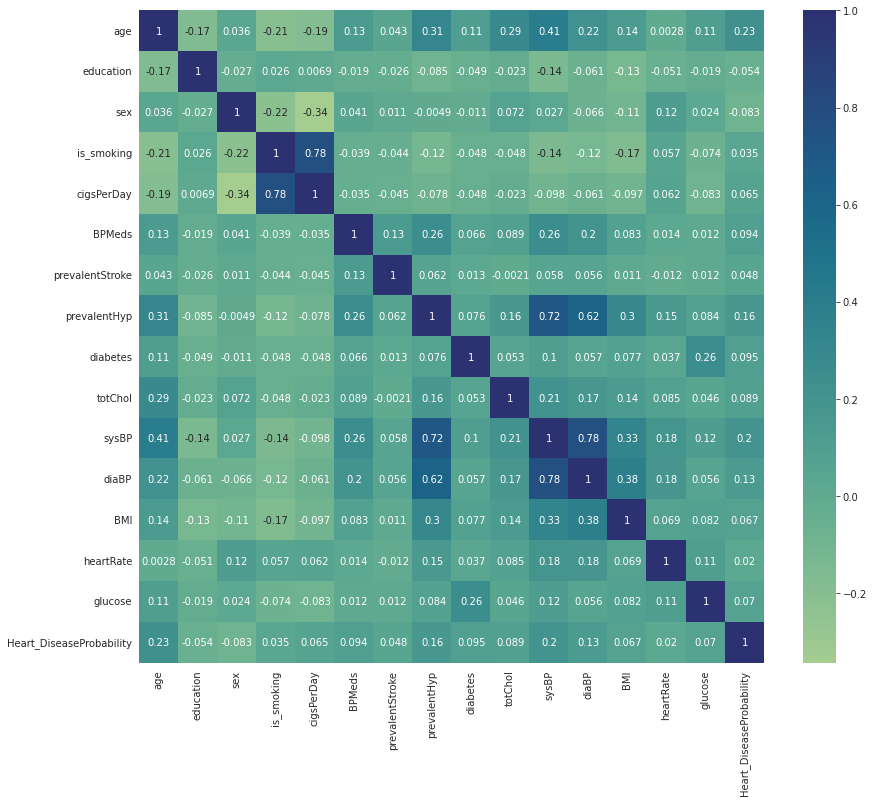

In [24]:
# ploting heat map finding correlation between columns
cdf = df_cardiovascular.corr()
plt.figure(figsize=(14,12))
sns.heatmap(cdf,annot = True,cmap="crest")

In [25]:
# Combining systolic and diastolic blood pressure column through formula 
df_cardiovascular['map']=round((df_cardiovascular['sysBP']+2*df_cardiovascular['diaBP'])/3,3) # calculating mean arterial pressure and storing in seperate column

# droping systolic and diastolic blood pressure column
df_cardiovascular.drop(['sysBP','diaBP'],axis=1,inplace=True)

In [26]:
# droping  is_smoking since it has a high collinearity with cidsPerDay column
df_cardiovascular.drop(['is_smoking'],axis=1,inplace=True)

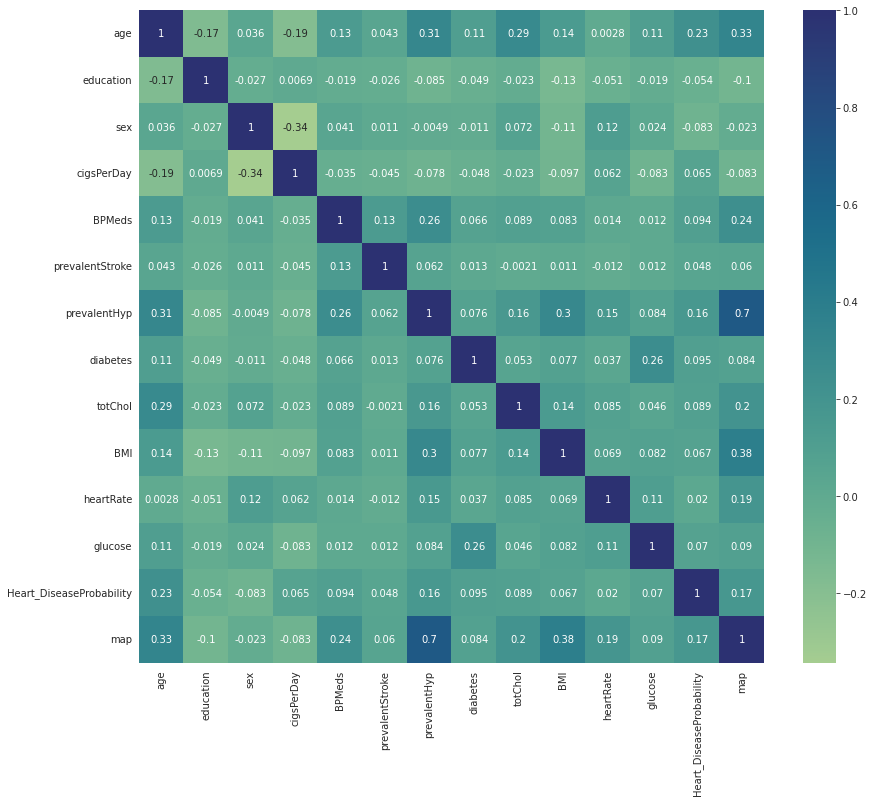

In [27]:
# ploting heat map finding correlation between columns
cdf = df_cardiovascular.corr()
plt.figure(figsize=(14,12))
sns.heatmap(cdf,annot = True,cmap="crest")

# **Univariate analysis**

In [28]:
df_cardiovascular['Heart_DiseaseProbability'].value_counts()

0    2714
1     475
Name: Heart_DiseaseProbability, dtype: int64

* 10-year risk of coronary heart disease Probability: “1”, means “Yes”, “0” means “No”)

##1. Heart disease (target variable) distribution

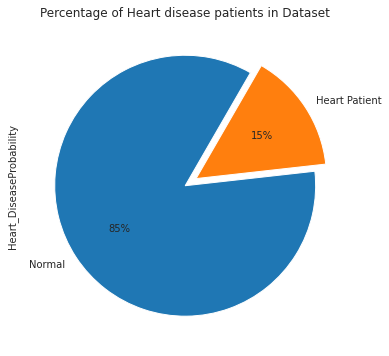

In [29]:
# Plotting the percentage pie plot
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharey=False, figsize=(14,6))
ax1 = df_cardiovascular['Heart_DiseaseProbability'].value_counts().plot.pie( x="Heart_DiseaseProbability" ,y ='no.of patients', 
autopct = "%1.0f%%",labels=["Normal","Heart Patient"], startangle = 60,ax=ax1,explode = (0,0.1))
ax1.set(title = 'Percentage of Heart disease patients in Dataset')
plt.show()

* According to pie chart, dataset contains 85% normal persons' and 15% heart patients' data.
* The class of the dataset is highly imbalanced, we will use SMOTE technique to handle class imbalance.

What is imbalanced data?

Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

Methods to handle imbalanced dataset

* Resampling
* SMOTE (Synthetic Minority Oversampling Technique)
* BalancedBaggingClassifier

We shall use SMOTE Technique here to balance our imbalanced dataset

* Highly imbalanced data will be dealt further at the time of model building.

##**2. Genderwise distribution**

In [30]:
# creating separate df for normal and heart patients

patient =df_cardiovascular[df_cardiovascular['Heart_DiseaseProbability']==1]

normal =df_cardiovascular[df_cardiovascular['Heart_DiseaseProbability']==0]

Text(0.5, 1.0, 'GENDER DISTRIBUTION ')

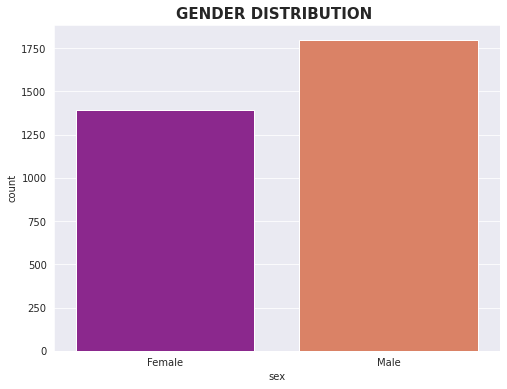

In [31]:
plt.figure(figsize=(8,6))
ax = sns.countplot(df_cardiovascular['sex'], palette='plasma')
ax.set(xticklabels = (['Female','Male']))
plt.title('GENDER DISTRIBUTION ', fontsize=15, weight='bold' )

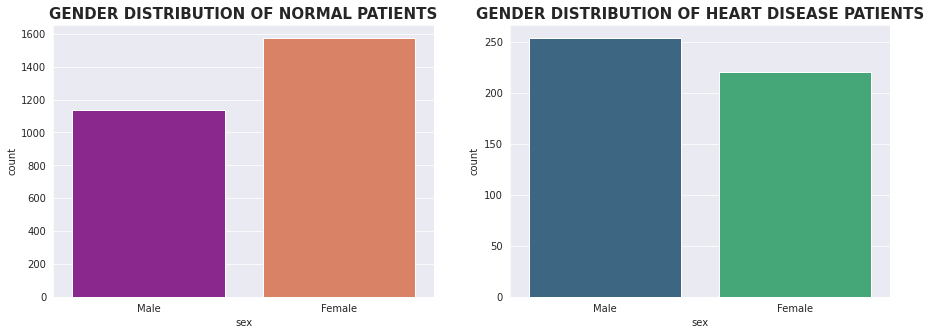

In [32]:
# plotting normal patients
fig,ax=plt.subplots(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(normal['sex'], palette='plasma')
ax1.set(xticklabels = (['Male','Female']))
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )


#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(patient['sex'], palette='viridis')
ax1.set(xticklabels = (['Male','Female']))
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

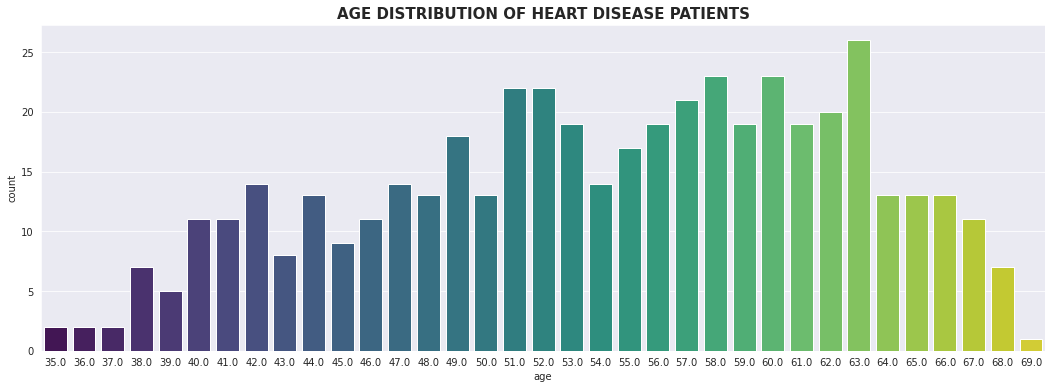

In [33]:

#plotting heart patients
plt.figure(figsize=(18,6))
sns.countplot(patient['age'], palette='viridis')
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

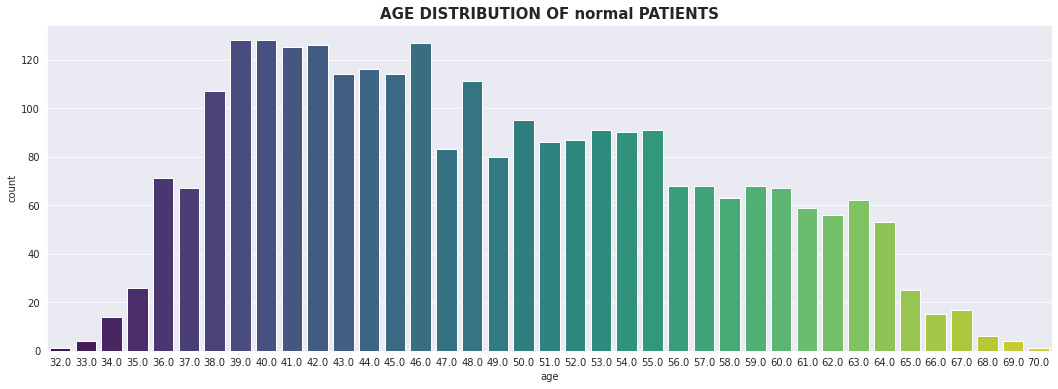

In [34]:
#plotting heart patients
plt.figure(figsize=(18,6))
sns.countplot(normal['age'], palette='viridis')
plt.title('AGE DISTRIBUTION OF normal PATIENTS', fontsize=15, weight='bold' )
plt.show()

* According to the chart, as age increases, the chances of suffering from heart problems are more likely.

## 4 Education Distribution

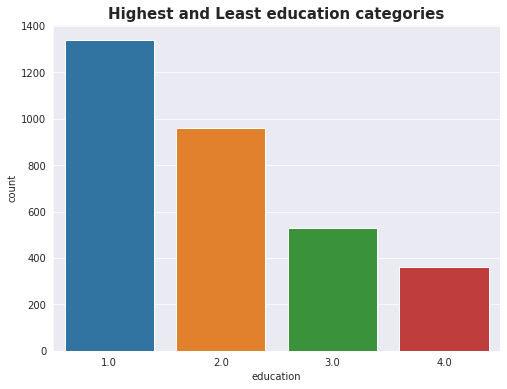

In [35]:
plt.figure(figsize=(8,6))
ax = sns.countplot(df_cardiovascular['education'])
plt.title('Highest and Least education categories', fontsize=15, weight='bold' )
plt.show()

* According to plot, highest and least education categories are 1 and 4 respectively.

##5 Body Mass Index (BMI) Distribution

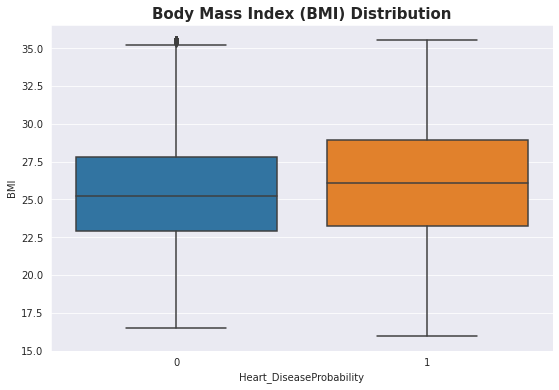

In [36]:
#plotting Body Mass Index (BMI) Distribution
plt.figure(figsize=(9,6))
sns.boxplot(x = 'Heart_DiseaseProbability' ,y = 'BMI', data =df_cardiovascular )
plt.title('Body Mass Index (BMI) Distribution', fontsize=15, weight='bold' )
plt.show()

* According to boxplot, Higher BMI leads to higher chances of Heart Disease

##**6.Cholestrol Distribution**

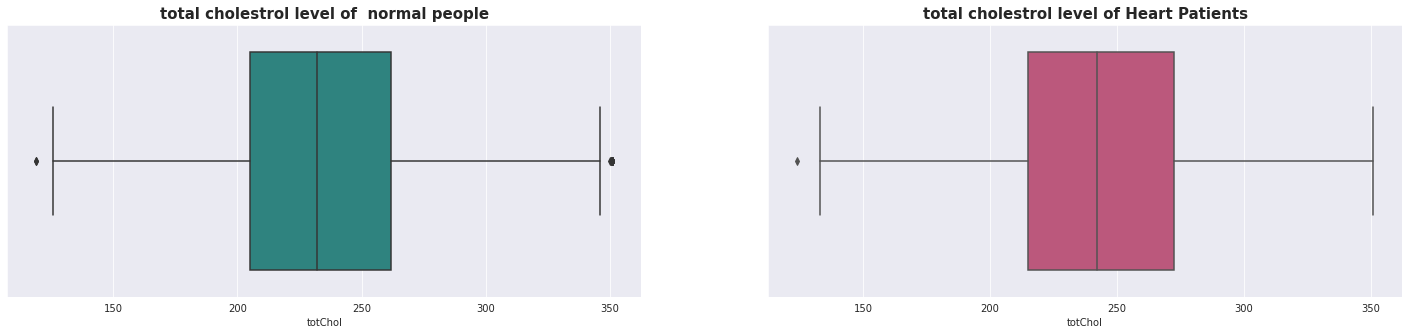

In [37]:
# plotting normal patients
fig = plt.figure(figsize=(25,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.boxplot(x='totChol',data = normal, palette='viridis')
plt.title('total cholestrol level of  normal people', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.boxplot(x='totChol',data = patient, palette='plasma')
plt.title('total cholestrol level of Heart Patients', fontsize=15, weight='bold' )
plt.show()

* Total Cholestrol level of heart patient seems to be slightly higher than normal patient.
* People who have cholesterol level more than 240 are prone to heart problems.

## 7 Mean Arterial Pressure (map) Distribution

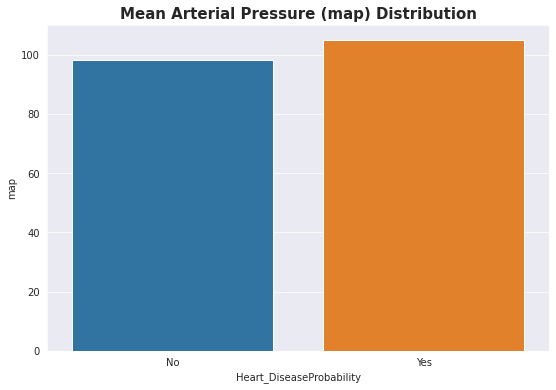

In [ ]:
#plotting Body Mass Index (BMI) Distribution
plt.figure(figsize=(9,6))
ax = sns.barplot(x = 'Heart_DiseaseProbability' ,y = 'map', data =df_cardiovascular,ci = False )
ax.set(xticklabels = (['No','Yes']))
plt.title('Mean Arterial Pressure (map) Distribution', fontsize=15, weight='bold' )
plt.show()

* In the above graph, the heart disease patients have higher MAP.
* If the value of MAP is above 96, the patient is more prone to Heart Disease or suffer Hypertension.

##**8.Mean and Median Visualization**

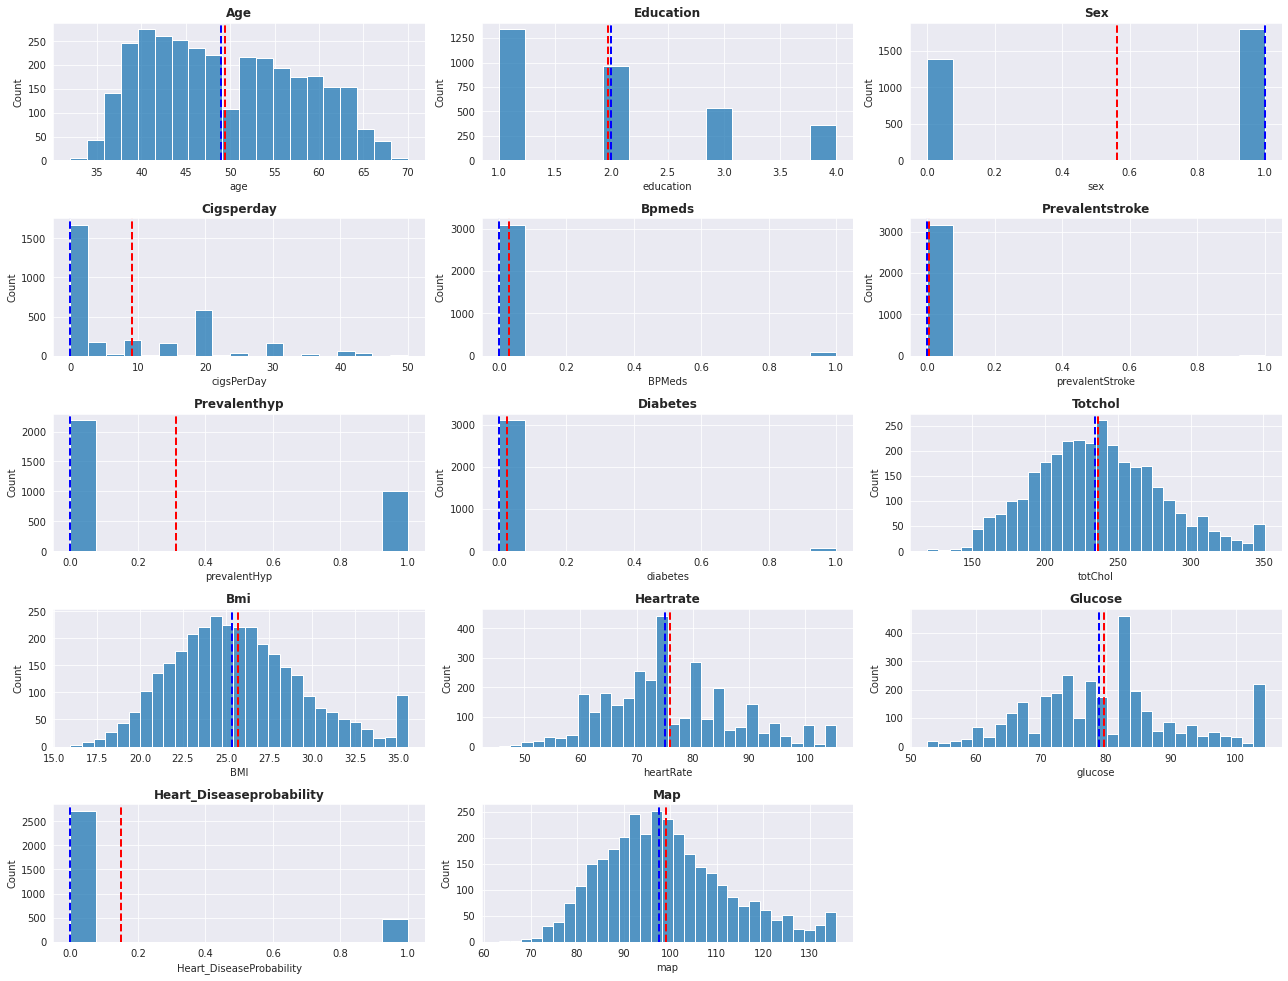

In [38]:
# Visualizing the mean and median lines for various attributes, 
# along with their distribution graphs.
plt.figure(figsize=(18,16))

# Making subplots for all the features to represent their mean, median and distributions
for i, column in enumerate(df_cardiovascular.columns):
  feature = df_cardiovascular[column]
  ax=plt.subplot(6, 3, i+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [39]:
df_cardiovascular.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3189 entries, 1 to 3389
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       3189 non-null   float64
 1   education                 3189 non-null   float64
 2   sex                       3189 non-null   int64  
 3   cigsPerDay                3189 non-null   float64
 4   BPMeds                    3189 non-null   float64
 5   prevalentStroke           3189 non-null   int64  
 6   prevalentHyp              3189 non-null   int64  
 7   diabetes                  3189 non-null   int64  
 8   totChol                   3189 non-null   float64
 9   BMI                       3189 non-null   float64
 10  heartRate                 3189 non-null   float64
 11  glucose                   3189 non-null   float64
 12  Heart_DiseaseProbability  3189 non-null   int64  
 13  map                       3189 non-null   float64
dtypes: float

# **Bivariate Analysis**

**1. BP Medication and Heart_DiseaseProbability**

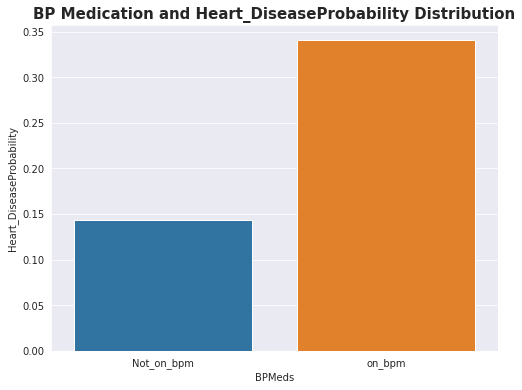

In [40]:
#plotting comparison the graph of BP Medication and Heart_DiseaseProbability
plt.figure(figsize=(8,6))
ax = sns.barplot(x = 'BPMeds', y = 'Heart_DiseaseProbability', data = df_cardiovascular,  ci= False)
ax.set(xticklabels = (['Not_on_bpm','on_bpm']))
plt.title('BP Medication and Heart_DiseaseProbability Distribution', fontsize=15, weight='bold' )
plt.show()

* According to the chart, People who take Blood pressure medication have a higher chance of suffering from heart disease.

**2. Prevalent Stroke and Heart_DiseaseProbability**

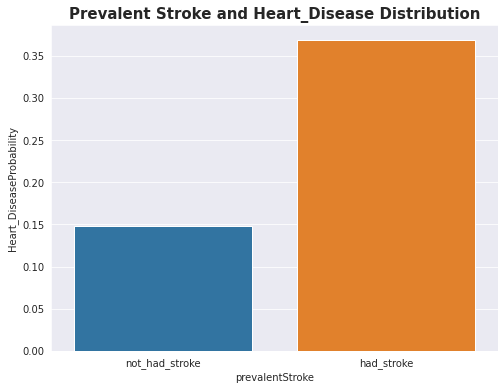

In [41]:
#plotting comparison the graph of Prevalent Stroke and Heart_DiseaseProbability
plt.figure(figsize=(8,6))
ax = sns.barplot(x = 'prevalentStroke', y = 'Heart_DiseaseProbability', data = df_cardiovascular,  ci= False)
ax.set(xticklabels = (['not_had_stroke','had_stroke']))
plt.title('Prevalent Stroke and Heart_Disease Distribution', fontsize=15, weight='bold' )
plt.show()

* According to the chart, people who previously had a stroke are more likely to suffer from Heart Disease.

**3. Sex and risk of Heart_DiseaseProbability**

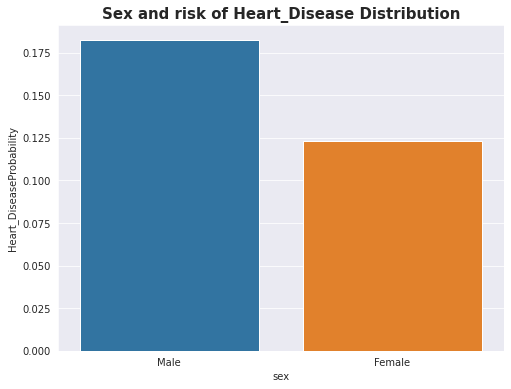

In [42]:
#plotting comparison the graph of Sex and risk of Heart_DiseaseProbability
plt.figure(figsize=(8,6))
ax = sns.barplot(x = 'sex', y = 'Heart_DiseaseProbability', data = df_cardiovascular,  ci= False)
ax.set(xticklabels = (['Male','Female']))
plt.title('Sex and risk of Heart_Disease Distribution', fontsize=15, weight='bold' )
plt.show()

* According to the bar chart, males are more prone to heart disease as compared to females.

**4.Education and Heart_DiseaseProbability**

[[Text(0, 0, 'No'), Text(0, 0, 'Yes')]]

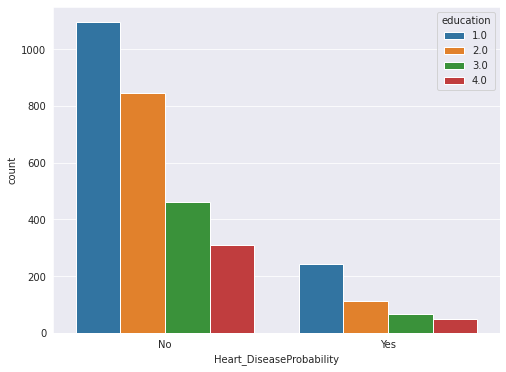

In [43]:
# count plot of education levels people having diseases
plt.figure(figsize=(8,6))
ax=sns.countplot(x ='Heart_DiseaseProbability', hue ='education', data = df_cardiovascular)
ax.set(xticklabels = (['No','Yes']))

**5. Diabetes and Heart_DiseaseProbability**

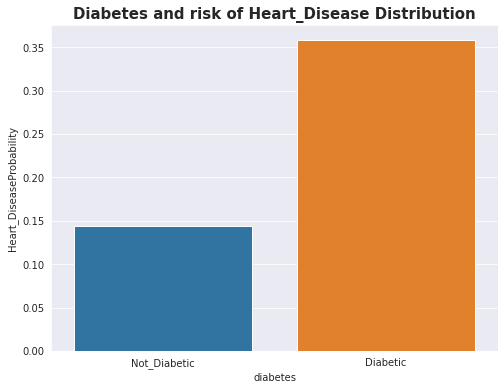

In [44]:
#plotting comparison the graph of Sex and risk of Heart_DiseaseProbability
plt.figure(figsize=(8,6))
ax = sns.barplot(x = 'diabetes', y = 'Heart_DiseaseProbability', data = df_cardiovascular,  ci= False)
ax.set(xticklabels = (['Not_Diabetic','Diabetic']))
plt.title('Diabetes and risk of Heart_Disease Distribution', fontsize=15, weight='bold' )
plt.show()

* According to the bar chart, Diabetic person is more likely to suffer from a heart disease.

#**Conclusion- EDA**

1. The dataset contains 85% normal persons and 15% heart patients 
2. Given dataset consists of 55% male and 45% female. 
3. Males are more prone to heart disease as compared to females. 
4.As age increases, the chances of suffering from heart problems are more likely. 
5. Higher BMI leads to higher chances of Heart Disease. 
6. Higher cholesterol indicates the higher chances of getting Heart Disease. 
7. If the value of MAP is above 96, the patient is more prone to Heart Disease or suffer Hypertension 
8. People who take Blood pressure medication have a higher chance of suffering from heart disease. 
9. People who previously had a stroke are more likely to suffer from Heart Disease. 
10. Diabetic person is more likely to suffer from a heart disease.

# **Models**

# **Dependent and Independent variables**

In [45]:
df_cardiovascular.columns

Index(['age', 'education', 'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose',
       'Heart_DiseaseProbability', 'map'],
      dtype='object')

In [46]:
# Splitting the data into set of independent variables and a dependent variable.
X = df_cardiovascular.drop('Heart_DiseaseProbability',axis=1)
y = df_cardiovascular['Heart_DiseaseProbability']

# **Handling imbalance data using SMOTE**

####**WHAT IS SMOTE ?**
This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input. This implementation of SMOTE does not change the number of majority cases. SMOTE takes the entire dataset as an input, but it increases the percentage of only the minority cases.

In [47]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [49]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote,y_smote = smote.fit_resample(df_cardiovascular.drop('Heart_DiseaseProbability',axis=1),df_cardiovascular['Heart_DiseaseProbability'])
print('Original dataset shape', len(df_cardiovascular))
print('Resampled dataset shape', len(df_cardiovascular))

Original dataset shape 3189
Resampled dataset shape 3189


In [50]:
# split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size=0.20)

In [51]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

##1.Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [53]:
# Get the model coefficients
lr_model.coef_

array([[ 0.70127194, -0.02793984, -0.60879201,  0.13679819,  0.17821624,
        -0.04222721, -0.37946161, -0.10850864,  0.13882625, -0.00266331,
         0.05271255,  0.15277048,  0.52046697]])

In [54]:
lr_model.intercept_

array([0.02687241])

In [55]:
train_pred = lr_model.predict_proba(X_train)
test_pred = lr_model.predict_proba(X_test)

In [56]:
# Get the predicted classes
X_pred_lr = lr_model.predict(X_train)
y_pred_lr = lr_model.predict(X_test)

In [57]:
#predicting probability
y_pred_proba_lr = lr_model.predict_proba(X_test)[:,1]

In [58]:
# Defining a function to train the input model and print evaluation matrix
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
def analyse_model(model, X_train, X_test, y_train, y_test):

  '''Takes classifier model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''

  # Feature importances
  try:
    try:
      importance = model.feature_importances_
      feature = features
    except:
      importance = np.abs(model.coef_[0])
      feature = X
    indices = np.argsort(importance)
    indices = indices[::-1]
  except:
    pass

  # Plotting Evaluation Metrics for train and test dataset
  for x, act, label in ((X_train, y_train, 'Train-Set'),(X_test, y_test, "Test-Set")):

    # Getting required metrics
    pred = model.predict(x)
    pred_proba = model.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(act, pred_proba)
        # Classification report
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,1)
    sns.heatmap(report.iloc[:-1, :-1].T, annot=True, cmap='coolwarm',fmt='.2f')
    plt.title(f'{label} Report')
    # Confusion Matrix
    plt.subplot(1,3,2)
    sns.heatmap(confusion_matrix(y_true=act, y_pred=pred), annot=True, cmap='coolwarm',fmt='.2f')
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    
    # AUC_ROC Curve
    plt.subplot(1,3,3)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
    plt.legend(loc=4)
    plt.title(f'{label} AUC_ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()

  # Plotting Feature Importance
  try:
    plt.figure(figsize=(18,3))
    plt.bar(range(len(indices)),importance[indices])
    plt.xticks(range(len(indices)), [feature[i] for i in indices])
    plt.title('Feature Importance')
    plt.tight_layout()
  except:
    pass
  plt.show()

  return model

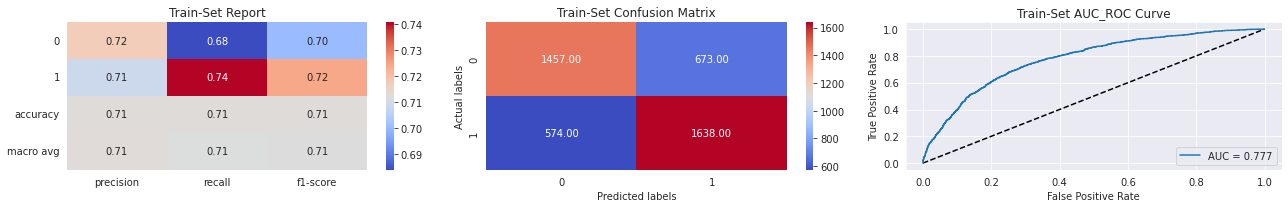

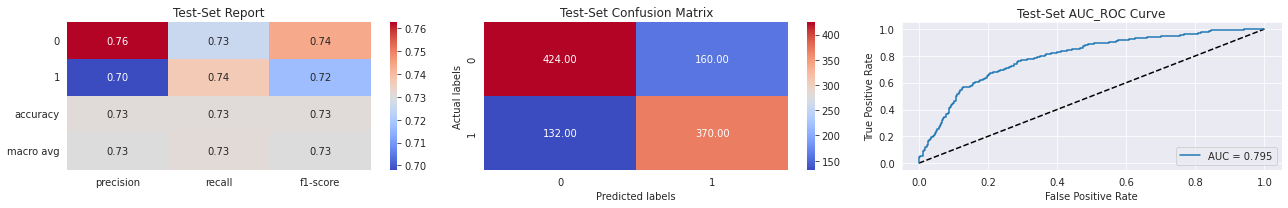

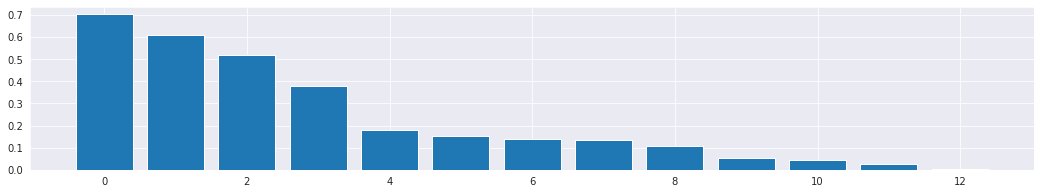

LogisticRegression(max_iter=10000)

In [59]:
# Analysing logistic Regression model
analyse_model(lr_model,X_train,X_test,y_train,y_test)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,Logistic Regression,0.731123,0.698113,0.737052,0.726027,0.717054,0.794804


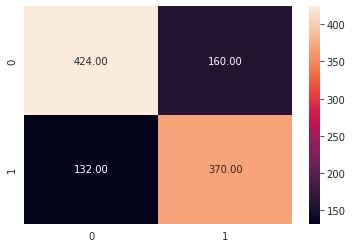

In [60]:
#Creating evaluation matrix
from sklearn.metrics import confusion_matrix,roc_auc_score,precision_score,recall_score,f1_score,accuracy_score
CM=confusion_matrix(y_test,y_pred_lr)
sns.heatmap(CM, annot=True,fmt='.2f')

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_lr)
roc=roc_auc_score(y_test, y_pred_proba_lr)
prec = precision_score(y_test, y_pred_lr)
rec = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

evaluation_metrics1 =pd.DataFrame([['Logistic Regression',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

evaluation_metrics1

# **2.KNN Model**

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,20)} 
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv =5)
# Fit the object to train dataset
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [62]:
#printing best parameters
knn_cv.best_params_

{'n_neighbors': 1}

In [63]:
#predicting
y_pred_knn = knn_cv.predict(X_test)

#predicting probability
y_pred_proba_knn = knn_cv.predict_proba(X_test)[:,1]

###Model Evaluation

In [64]:
from sklearn.metrics import roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn import metrics

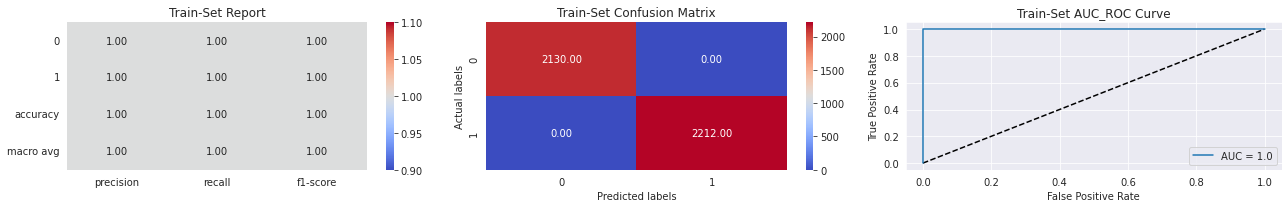

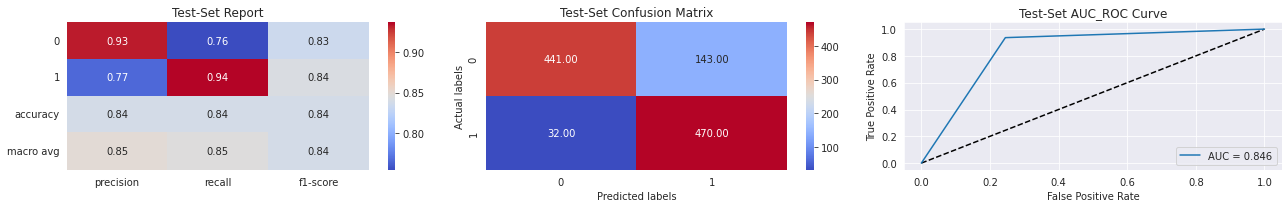

<Figure size 1296x216 with 0 Axes>

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [65]:
# Analysing KNN model
analyse_model(knn_cv,X_train,X_test,y_train,y_test)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,KNN,0.838858,0.766721,0.936255,0.755137,0.843049,0.845696


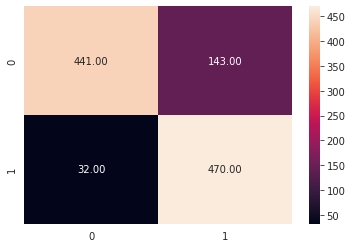

In [66]:
CM=confusion_matrix(y_test,y_pred_knn)
sns.heatmap(CM, annot=True, fmt='.2f')

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_knn)
roc=roc_auc_score(y_test, y_pred_proba_knn)
prec = precision_score(y_test, y_pred_knn)
rec = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

evaluation_metrics2 =pd.DataFrame([['KNN',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

evaluation_metrics2

# **3.Decision Tree Classifier**

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
# Decision Tree
dtclassifier = DecisionTreeClassifier()

# Fitting model
dtclassifier.fit(X_train,y_train)

#predicting
y_dt_predict = dtclassifier.predict(X_test)

#predicting probability
y_dt_proba_predict = dtclassifier.predict_proba(X_test)[:,1]


###Model Evaluation

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,KNN,0.838858,0.766721,0.936255,0.755137,0.843049,0.845696


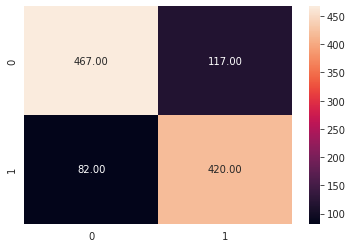

In [69]:
CM = confusion_matrix(y_test,y_dt_predict)
sns.heatmap(CM,annot = True, fmt='.2f')

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP) 
acc = accuracy_score(y_test,y_dt_predict)
roc = roc_auc_score(y_test,y_dt_predict)
prec = precision_score(y_test,y_dt_predict)
rec = recall_score(y_test,y_dt_predict)
f1 = f1_score(y_test,y_dt_predict)

evaluation_metrics3 = pd.DataFrame([['DecisionTree',acc, prec,rec,specificity, f1,roc]],
columns =['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

evaluation_metrics2

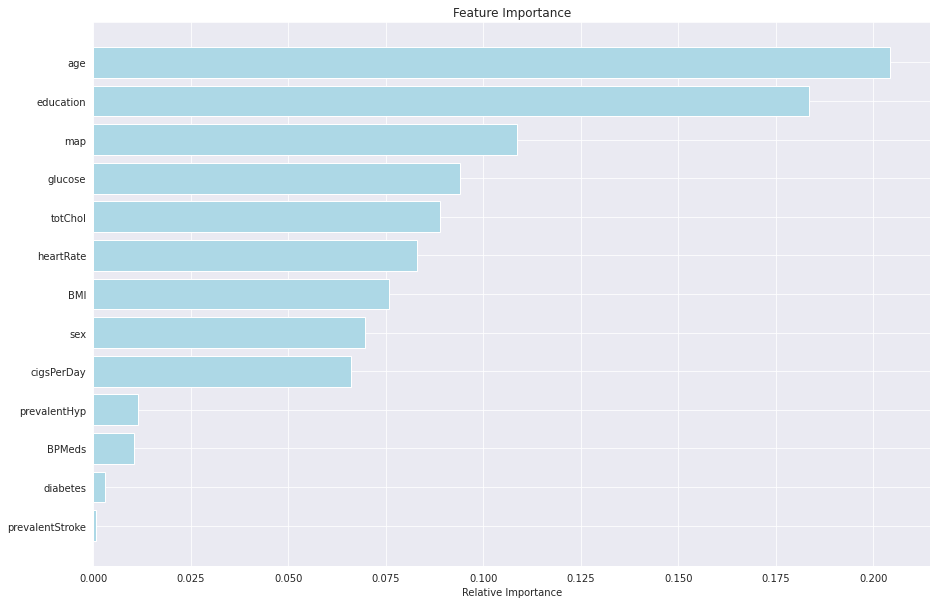

In [70]:
#shows the graph of feature importance
features = X.columns
importances = dtclassifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='#ADD8E6', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#**4.Random Forest**

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
classifier = RandomForestClassifier()
grid_values_rm = {'n_estimators' : [85,90,95] , 'max_leaf_nodes' : [135,137,139], 'max_depth' : [17,18,19]}
rm_classifier = GridSearchCV(classifier,param_grid = grid_values_rm, scoring = 'roc_auc',cv = 5)

In [72]:
# Fit the object to train dataset
rm_classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [17, 18, 19],
                         'max_leaf_nodes': [135, 137, 139],
                         'n_estimators': [85, 90, 95]},
             scoring='roc_auc')

In [73]:
#printing best parameters
rm_classifier.best_params_

{'max_depth': 17, 'max_leaf_nodes': 139, 'n_estimators': 85}

In [74]:
#predicting
y_pred_rf = rm_classifier.predict(X_test)

#predicting probability
y_pred_proba_rf = rm_classifier.predict_proba(X_test)[:,1]

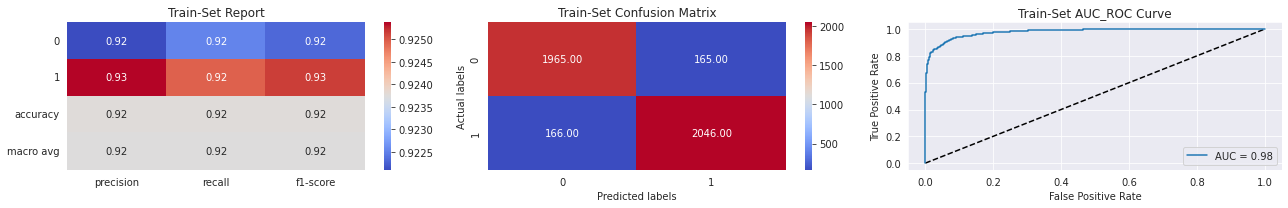

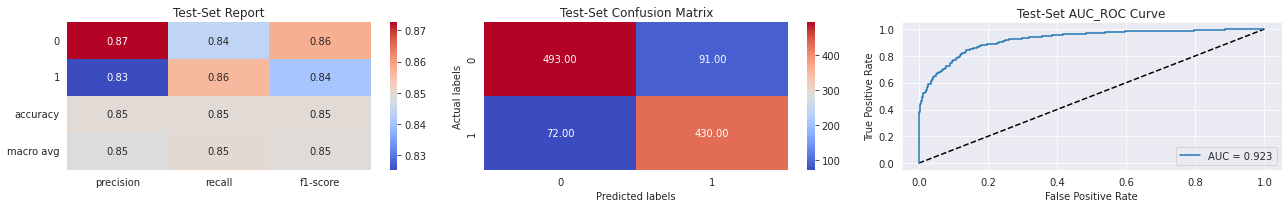

<Figure size 1296x216 with 0 Axes>

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [17, 18, 19],
                         'max_leaf_nodes': [135, 137, 139],
                         'n_estimators': [85, 90, 95]},
             scoring='roc_auc')

In [75]:
# Analysing model Random forest model
analyse_model(rm_classifier,X_train,X_test,y_train,y_test)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,Random Forest,0.849908,0.825336,0.856574,0.844178,0.840665,0.850376


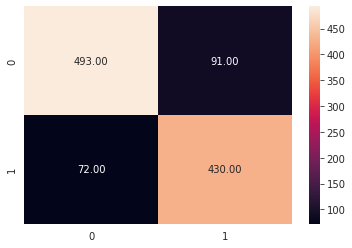

In [76]:
# evaluation metric and confusion matrix for Random Forest model
CM=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(CM, annot=True, fmt='.2f')

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_rf)
roc=roc_auc_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

evaluation_metrics4 =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

evaluation_metrics4

In [77]:
optimal_rf= rm_classifier.best_estimator_

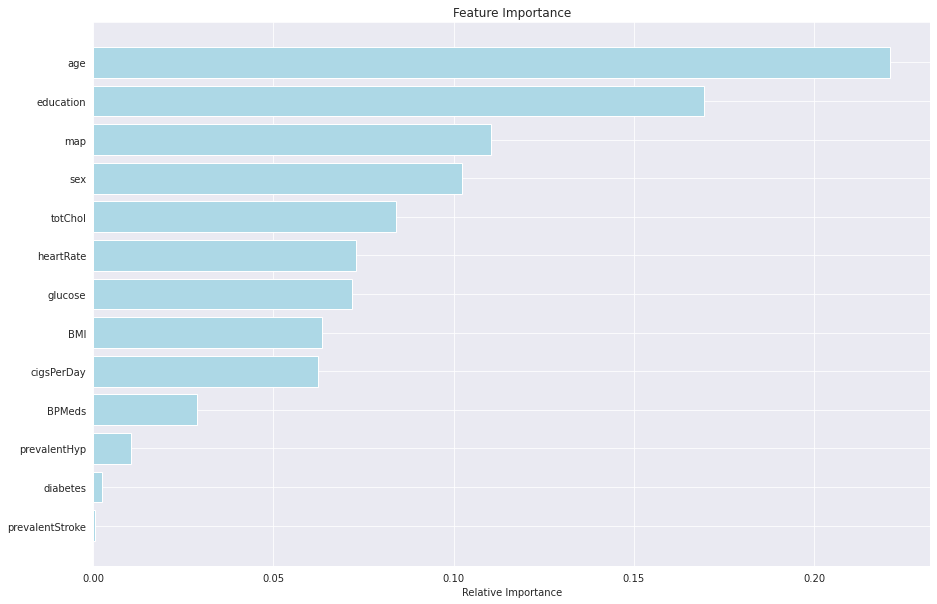

In [78]:
#shows the graph of feature importance
features = X.columns
importances = optimal_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='#ADD8E6', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **5.Gradient Boost Classifier**

In [79]:
#importing gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
gb_classifier = GradientBoostingClassifier()

In [81]:
# creating param dict to check diffirent value of parameter
n_estimators=[190,195,200]
max_depth=[9,10,11]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [82]:
#grid search for gradient bossting
gb_grid= GridSearchCV(gb_classifier,param_grid=params,verbose=0)
gb_grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [9, 10, 11],
                         'n_estimators': [190, 195, 200]})

In [83]:
#printing best parameter
gb_grid.best_params_

{'max_depth': 10, 'n_estimators': 195}

In [84]:
#predicting
y_pred_gbm = gb_grid.predict(X_test)

#predicting probability
y_pred_proba_gbm = gb_grid.predict_proba(X_test)[:,1]

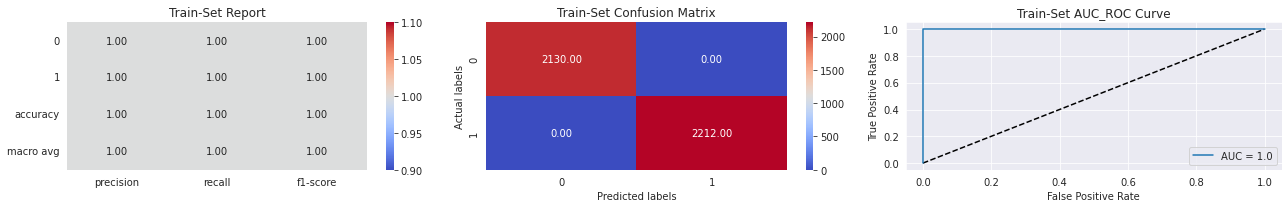

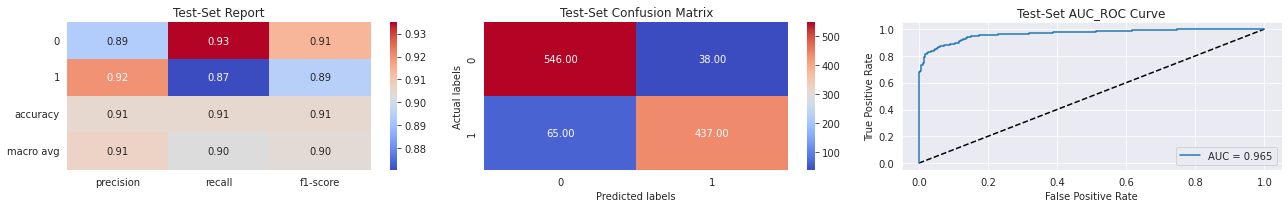

<Figure size 1296x216 with 0 Axes>

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [9, 10, 11],
                         'n_estimators': [190, 195, 200]})

In [85]:
# Analysing Gradient Boost model
analyse_model(gb_grid,X_train,X_test,y_train,y_test)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,GradientBoosting,0.905157,0.92,0.870518,0.934932,0.894575,0.902725


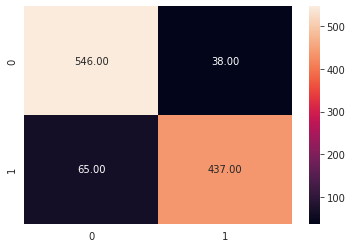

In [86]:
# evaluation metric and confusion matrix for Gradient Boost model
CM=confusion_matrix(y_test,y_pred_gbm)
sns.heatmap(CM, annot=True, fmt='.2f')

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_gbm)
roc=roc_auc_score(y_test, y_pred_gbm)
prec = precision_score(y_test, y_pred_gbm)
rec = recall_score(y_test, y_pred_gbm)
f1 = f1_score(y_test, y_pred_gbm)

evaluation_metrics5 =pd.DataFrame([['GradientBoosting',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

evaluation_metrics5

In [87]:
optimal_gb=gb_grid.best_estimator_

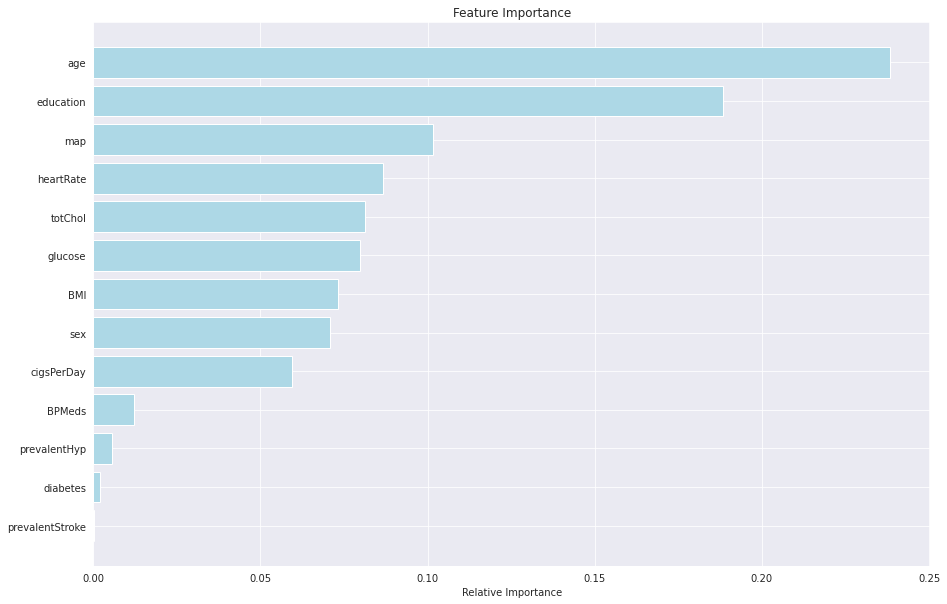

In [88]:
#shows the graph of feature importance
features = X.columns
importances = optimal_gb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='#ADD8E6', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **6.XGBoost**

In [89]:
# importing XG Boost
import xgboost as xgb

xgb_model = xgb.XGBClassifier()

#creating param dict for gridsearch
n_estimators=[170,175,180]
max_depth=[30,35,40]
params = {'n_estimators':n_estimators,'max_depth':max_depth }

#creating xgb grid model
xgb= GridSearchCV(xgb_model,param_grid=params,verbose=0)

# Fitting model
xgb.fit(X_train,y_train)

GridSearchCV(estimator=XGBClassifier(),
             param_grid={'max_depth': [30, 35, 40],
                         'n_estimators': [170, 175, 180]})

In [90]:
#printing best parameters
xgb.best_params_

{'max_depth': 30, 'n_estimators': 180}

In [91]:
#predicting
y_pred_xgb = xgb.predict(X_test)

#predicting probability
y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]

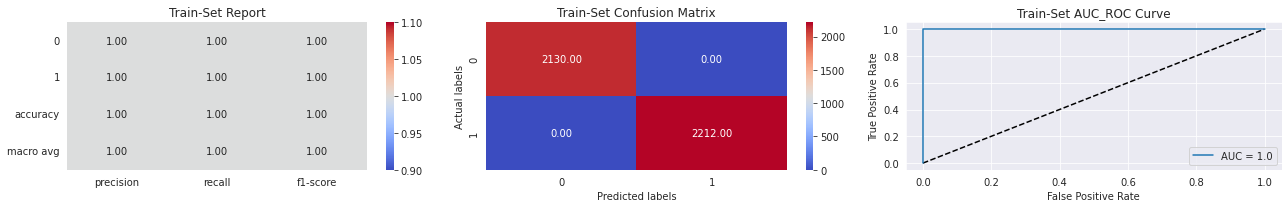

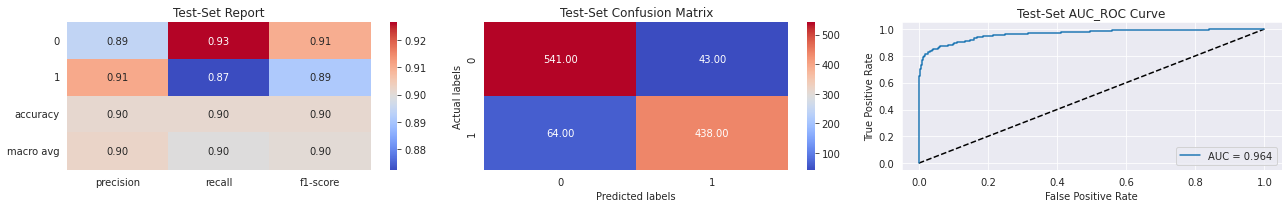

<Figure size 1296x216 with 0 Axes>

GridSearchCV(estimator=XGBClassifier(),
             param_grid={'max_depth': [30, 35, 40],
                         'n_estimators': [170, 175, 180]})

In [92]:
# Analysing XG Boost model
analyse_model(xgb,X_train,X_test,y_train,y_test)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,XGBoost,0.901473,0.910603,0.87251,0.92637,0.89115,0.89944


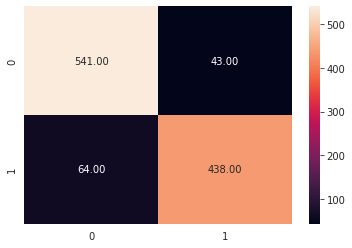

In [93]:
# evaluation metric and confusion matrix for XG Boost model
CM=confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(CM, annot=True, fmt='.2f')

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_xgb)
roc=roc_auc_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

evaluation_metrics6 =pd.DataFrame([['XGBoost',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

evaluation_metrics6

In [94]:
# finding best estimator
optimal_xgb=xgb.best_estimator_

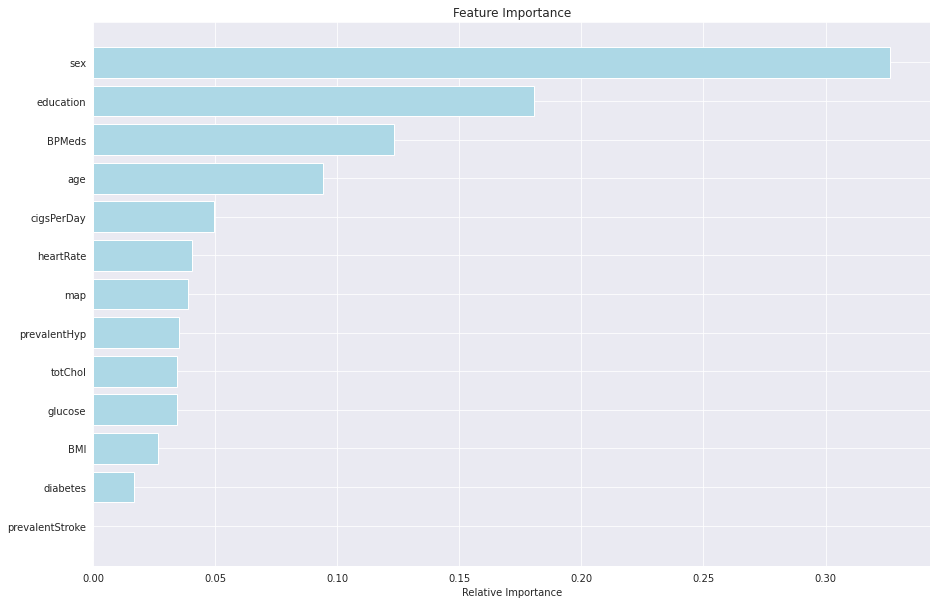

In [95]:
#shows the graph of feature importance
features = X.columns
importances = optimal_xgb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='#ADD8E6', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **7.Naive Bayes Classifier**

In [97]:
from sklearn.naive_bayes import GaussianNB

In [100]:
# Creating naive bayes Model
gnb = GaussianNB()

#Fitting the Model
gnb.fit(X_train,y_train)

#Making prediction on training and testing set
y_pred_gnb = gnb.predict(X_test)

In [ ]:
# Creating naive bayes model 
gnb = GaussianNB()

# Fitting the model
gnb.fit(X_train, y_train)
 
# Making predictions on training and testing set
y_pred_gnb = gnb.predict(X_test)

In [101]:
# Display accuracy scores for training and testing sets
print(accuracy_score(y_pred_gnb, y_test))

0.7099447513812155


In [102]:
# Prediction probabilities for naive bayes classifier
y_pred_proba_gnb = gnb.predict_proba(X_test)[:,1]

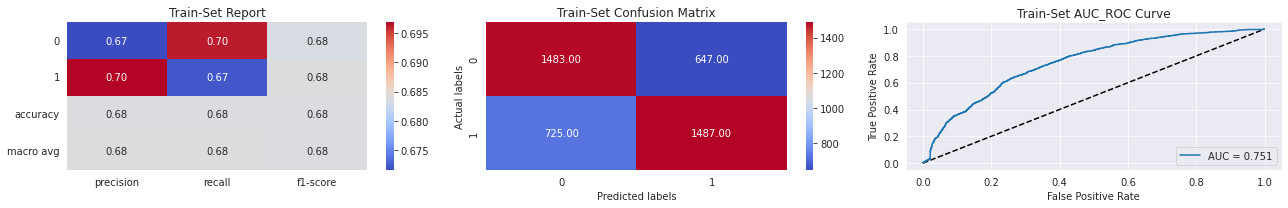

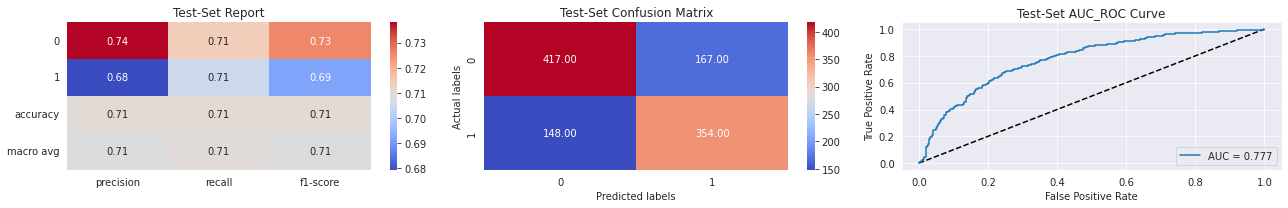

<Figure size 1296x216 with 0 Axes>

GaussianNB()

In [103]:
# Analysing Naive Bayes model
analyse_model(gnb,X_train,X_test,y_train,y_test)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,Naive Bayes,0.709945,0.679463,0.705179,0.714041,0.692082,0.70961


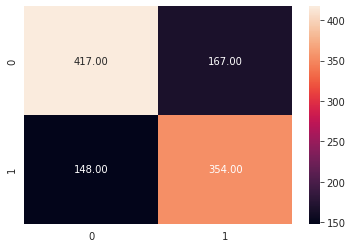

In [104]:
# evaluation metric and confusion matrix for Naive Bayes classifier model
CM=confusion_matrix(y_test,y_pred_gnb)
sns.heatmap(CM, annot=True, fmt='.2f')

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_gnb)
roc=roc_auc_score(y_test, y_pred_gnb)
prec = precision_score(y_test, y_pred_gnb)
rec = recall_score(y_test, y_pred_gnb)
f1 = f1_score(y_test, y_pred_gnb)

evaluation_metrics7 =pd.DataFrame([['Naive Bayes',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

evaluation_metrics7

# **8.Support Vector Classifier**

In [106]:
# importing support vector classifier
from sklearn.svm import SVC

In [109]:
#Support vector classifier
svc = SVC()

#running grid search for optimal parameter
param_grid = {
    'C': [0.1,1,10],
    'gamma':[1,0.1,0.01],
    'kernel':['linear','rbf','sigmoid'],
    'probability':[True]  
}

svc_classifier = GridSearchCV(svc,param_grid,cv=2)

#fitting the model
svc_classifier.fit(X_train,y_train)

#Predicting
y_pred_svc = svc_classifier.predict(X_test)

#predicting probability
y_pred_proba_svc = svc_classifier.predict_proba(X_test)[:,1]

In [111]:
# Support vector classification model's best parameters
svc_classifier.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf', 'probability': True}

* Model Evaluation

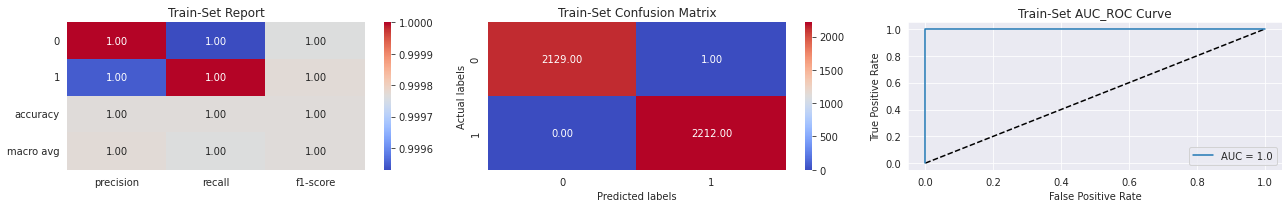

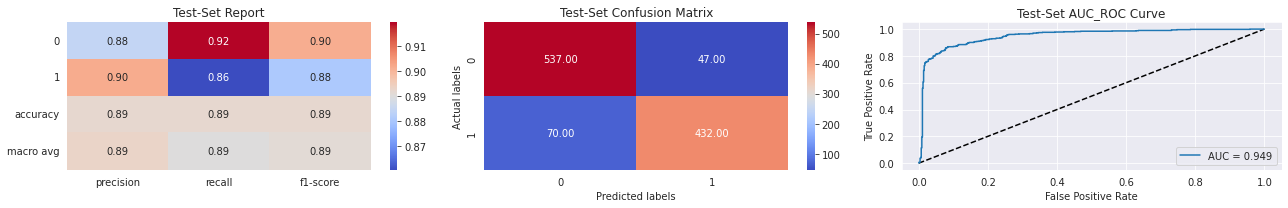

<Figure size 1296x216 with 0 Axes>

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear', 'rbf', 'sigmoid'],
                         'probability': [True]})

In [112]:
# Analysing Support vector classication model
analyse_model(svc_classifier,X_train,X_test,y_train,y_test)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,SupportVector,0.892265,0.901879,0.860558,0.919521,0.880734,0.890039


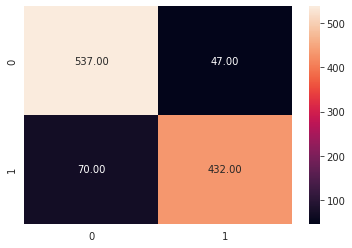

In [113]:
# evaluation metric and confusion matrix for support vector model
CM=confusion_matrix(y_test,y_pred_svc)
sns.heatmap(CM, annot=True, fmt='.2f')

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_svc)
roc=roc_auc_score(y_test, y_pred_svc)
prec = precision_score(y_test, y_pred_svc)
rec = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)

evaluation_metrics8 =pd.DataFrame([['SupportVector',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

evaluation_metrics8

# **Models' Evaluation Matrix**

In [116]:
# Evaluation metrics list
evaluation_metrics = [evaluation_metrics1,evaluation_metrics2,evaluation_metrics3,
                      evaluation_metrics4,evaluation_metrics5,evaluation_metrics6,
                      evaluation_metrics7,evaluation_metrics8]

In [120]:
# Concatnating all evaluation metrics into one DataFrame
em_list=pd.concat(evaluation_metrics).reset_index(drop=True).set_index('Model')

# using seaborn color palette as well as
# min('lighblue'), mid(green), max('blue') values
cm = sns.light_palette("lightblue", as_cmap=True)
em_list.style.background_gradient(cmap=cm).set_precision(2).highlight_min(axis=0, color='lightblue').highlight_max(axis=0, color='blue')

,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
Model,,,,,,
Logistic Regression,0.73,0.70,0.74,0.73,0.72,0.79
KNN,0.84,0.77,0.94,0.76,0.84,0.85
DecisionTree,0.82,0.78,0.84,0.80,0.81,0.82
Random Forest,0.85,0.83,0.86,0.84,0.84,0.85
GradientBoosting,0.91,0.92,0.87,0.93,0.89,0.90
XGBoost,0.90,0.91,0.87,0.93,0.89,0.90
Naive Bayes,0.71,0.68,0.71,0.71,0.69,0.71
SupportVector,0.89,0.90,0.86,0.92,0.88,0.89


##ROC_AUC bar plot of all models

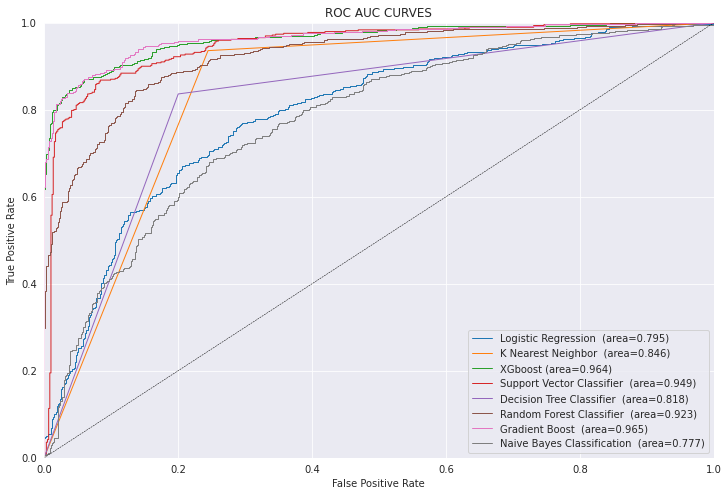

In [123]:
# ROC_AUC bar plot of all models
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))


roc_auc_plot(y_test,lr_model.predict_proba(X_test),label='Logistic Regression ',l='-')
roc_auc_plot(y_test,knn_cv.predict_proba(X_test),label='K Nearest Neighbor ',l='-')
roc_auc_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')
roc_auc_plot(y_test,svc_classifier.predict_proba(X_test),label='Support Vector Classifier ',l='-')
roc_auc_plot(y_test,dtclassifier.predict_proba(X_test),label='Decision Tree Classifier ',l='-')
roc_auc_plot(y_test,rm_classifier.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,gb_grid.predict_proba(X_test),label='Gradient Boost ',l='-')
roc_auc_plot(y_test,gnb.predict_proba(X_test),label='Naive Bayes Classification ',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('ROC AUC CURVES')
sns.despine()

Here, we can see the highest average area under the curve (AUC) of 0.965 is attained by Gradient Boost Classifier and second highest is of 0.95 attained by Support Vector Classifier.

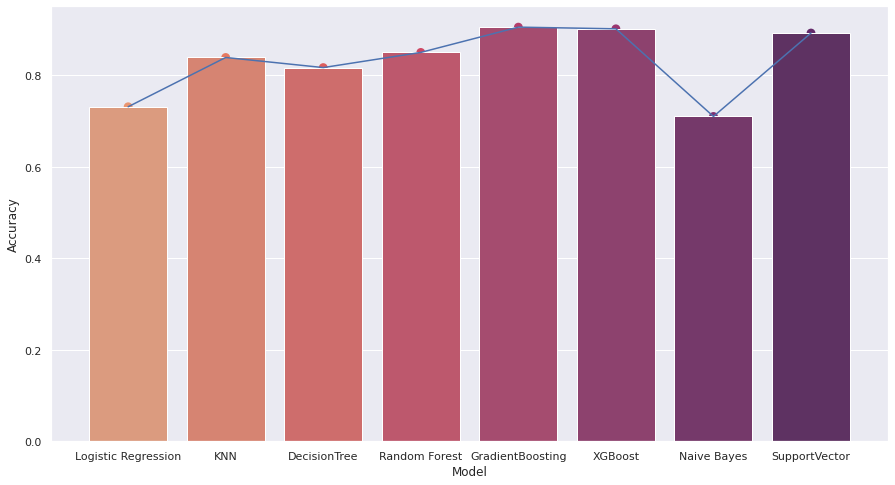

In [124]:
#Accuracy barplot of model's
em_list = em_list.reset_index(drop=False)
sns.set(rc={'figure.figsize':(15,8)})
sns.pointplot(data=em_list,x='Model',y='Accuracy',palette = 'flare')
sns.barplot(data=em_list,x='Model',y='Accuracy',palette = 'flare')
sns.lineplot(data=em_list,x='Model',y='Accuracy',palette = 'flare')

* We can see the Highest Accuracy among all the models is of Gradient Boosting followed by Support Vector Classifier.

#Conclusion - Model
1. According to **Decision Tree and Random forest model**, **age** is the most important feature but according to **gradient boost and XG boost model**, most important features are **heart rate and sex respectively**.
2. **Gradient boost model is the most accurate model** among  all the models, on the basis of evaluation parameters such as  **Accuracy (90.5%), Precision (92%), Specificity (93%), F1 score (89%), and AUC-ROC score (90%)**.
3. **KNN model** is the best model on the basis of **Recall (93.6%)**.
4. **Logistic Regression model** has the least **Accuracy (73%)**.